<font size=6><b> Lec05. 합성곱신경망 (CNN : convolution NN)

* ref : https://www.tensorflow.org/?hl=ko
* ref : https://keras.io/ko/
* ref : https://keras.io/api/layers/core_layers/dense/

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras import Sequential
from keras.initializers import GlorotNormal

In [2]:
import tensorflow as tf
tf.random.set_seed(1234)
np.random.seed(1234)

# Data Load

In [3]:
from keras.datasets import mnist

In [4]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

# 전처리 & 가공

## Flatten
* 이미지 픽셀 (28*28) : 행렬(2D) --> arr(1D)

In [5]:
X_train.shape 

(60000, 28, 28)

In [6]:
X_train = X_train.reshape(60000, -1)
X_test  = X_test.reshape(10000, -1)

## 정규화(픽셀값 스케일링)
* 0 ~ 255 픽셀값을 0 ~1 값으로 변경
* MinMaxScaler()

In [7]:
X_train_scaler = X_train / 255.0
X_test_scaler  = X_test / 255.0

# 모델 (Neural Network, FC(fully connected))

## 모델&학습

In [8]:
model = Sequential()
model.add(Dense(units=300, input_dim=28*28, activation='relu', kernel_initializer='glorot_normal')) #입력층
model.add(Dense(units=100,  activation='relu'))              #히든레이어
model.add(Dense(units=60,  activation='relu'))              #히든레이어
model.add(Dense(units=10,  activation='softmax'))           #출력층  #3종이상도 상관없음 (2종은 sigmoid 써도됨)
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 60)                6060      
                                                                 
 dense_3 (Dense)             (None, 10)                610       
                                                                 
Total params: 272,270
Trainable params: 272,270
Non-trainable params: 0
_________________________________________________________________


In [9]:
fit_hisroty = model.fit(X_train_scaler, y_train , batch_size = 128, validation_split=0.2, epochs=10)
print(fit_hisroty)
print ( model.evaluate(X_test_scaler, y_test)  )

Epoch 1/10
375/375 [==============================] - 3s 5ms/step - loss: 0.3157 - accuracy: 0.9093 - val_loss: 0.1497 - val_accuracy: 0.9572
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1185 - accuracy: 0.9645 - val_loss: 0.1087 - val_accuracy: 0.9669
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0752 - accuracy: 0.9773 - val_loss: 0.1114 - val_accuracy: 0.9673
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0540 - accuracy: 0.9827 - val_loss: 0.0957 - val_accuracy: 0.9726
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0390 - accuracy: 0.9880 - val_loss: 0.0888 - val_accuracy: 0.9755
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0302 - accuracy: 0.9905 - val_loss: 0.0942 - val_accuracy: 0.9730
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0242 - accuracy: 0.9922 - val_loss: 0.1035 - val_accuracy: 0.9733
Epoch 

## 평가 시각화

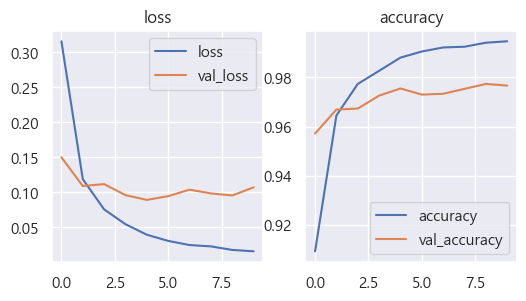

In [10]:
plt.figure(figsize=(6,3))
ax1 = plt.subplot(1,2,1)
ax1.plot(fit_hisroty.history['loss']    , label='loss')
ax1.plot(fit_hisroty.history['val_loss'], label='val_loss')
ax1.legend()
ax1.set_title("loss")

ax2 = plt.subplot(1,2,2)
ax2.plot(fit_hisroty.history['accuracy']    , label='accuracy')
ax2.plot(fit_hisroty.history['val_accuracy'], label='val_accuracy')
ax2.legend()
ax2.set_title("accuracy")

plt.show()

# 합성곱신경망 (CNN : convolution NN)

<img src="https://codetorial.net/tensorflow/_images/convolutional_neural_network_05.png" width=700>

- ref : https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53

<img src = 'https://miro.medium.com/v2/resize:fit:640/format:webp/1*uAeANQIOQPqWZnnuH-VEyw.jpeg'>

In [11]:
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.initializers import GlorotNormal,HeNormal  

## Conv2D
<pre>
<b>tf.keras.layers.Conv2D( filters, kernel_size, strides=(1, 1), padding='valid', activation=None, kernel_initializer='glorot_uniform',</b> data_format=None, dilation_rate=(1, 1), groups=1, use_bias=True,  bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,
    bias_constraint=None, **kwargs)

<b>tf.keras.layers.MaxPooling2D( pool_size, strides=None, padding='valid',</b> data_format=None,   **kwargs)

In [37]:
model = Sequential()
# ========= CNN ==============
model.add(Conv2D( filters = 16 ,input_shape =(28,28,1), kernel_size = (5,5), activation='relu', kernel_initializer='glorot_uniform'))
model.add(MaxPool2D( pool_size=(2, 2), padding='valid'))
model.add(Conv2D(24 , kernel_size = (5,5), activation='relu'))
model.add(MaxPool2D( pool_size=(2, 2)))

# ========= Fully Connected ==============
model.add(Flatten())
model.add(Dense(50, activation='relu'))      # 은닉층 - > 많이 줄 필요 없음, 이미 학습완료
model.add(Dense(10,activation='softmax'))   # 출력층 - >  출력 수 맞추기, 회귀는 activation 필요없음
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 24)          9624      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 24)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 384)               0         
                                                                 
 dense_6 (Dense)             (None, 50)               

- fc 파라미터 : 272,270
- CNN 파라미터 : 29,800
CNN이 훨씬 축소됨

In [18]:
X_train_scaler.shape, X_test_scaler.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [14]:
X_train_scaler = X_train_scaler.reshape(-1,28,28,1)

X_test_scaler = X_test_scaler.reshape(-1,28,28,1)

In [15]:
X_train_scaler.shape, X_test_scaler.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [17]:
fit_hisroty = model.fit(X_train_scaler, y_train , batch_size = 128, validation_split=0.2, epochs=10)
print(fit_hisroty)
print ( model.evaluate(X_test_scaler, y_test)  )

Epoch 1/10
375/375 [==============================] - 11s 28ms/step - loss: 0.3534 - accuracy: 0.8943 - val_loss: 0.1248 - val_accuracy: 0.9629
Epoch 2/10
375/375 [==============================] - 10s 28ms/step - loss: 0.0947 - accuracy: 0.9707 - val_loss: 0.0732 - val_accuracy: 0.9780
Epoch 3/10
375/375 [==============================] - 10s 28ms/step - loss: 0.0663 - accuracy: 0.9797 - val_loss: 0.0636 - val_accuracy: 0.9808
Epoch 4/10
375/375 [==============================] - 10s 28ms/step - loss: 0.0512 - accuracy: 0.9848 - val_loss: 0.0611 - val_accuracy: 0.9805
Epoch 5/10
375/375 [==============================] - 10s 28ms/step - loss: 0.0438 - accuracy: 0.9865 - val_loss: 0.0476 - val_accuracy: 0.9858
Epoch 6/10
375/375 [==============================] - 10s 28ms/step - loss: 0.0374 - accuracy: 0.9890 - val_loss: 0.0449 - val_accuracy: 0.9864
Epoch 7/10
375/375 [==============================] - 11s 28ms/step - loss: 0.0331 - accuracy: 0.9894 - val_loss: 0.0466 - val_accuracy:

## 평가 시각화

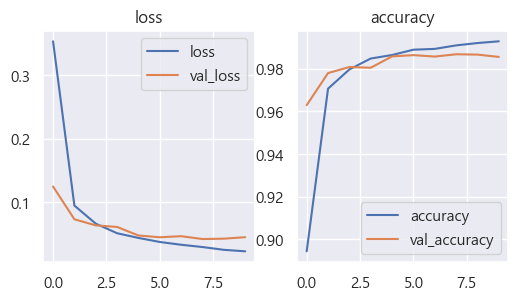

In [35]:
plt.figure(figsize=(6,3))
ax1 = plt.subplot(1,2,1)
ax1.plot(fit_hisroty.history['loss']    , label='loss')
ax1.plot(fit_hisroty.history['val_loss'], label='val_loss')
ax1.legend()
ax1.set_title("loss")

ax2 = plt.subplot(1,2,2)
ax2.plot(fit_hisroty.history['accuracy']    , label='accuracy')
ax2.plot(fit_hisroty.history['val_accuracy'], label='val_accuracy')
ax2.legend()
ax2.set_title("accuracy")

plt.show()

## 성능비교 (fc  vs  CNN)
- fc : [0.09356394410133362, 0.9778000116348267] -> loss,accuracy
- CNN : [0.03341473639011383, 0.9883000254631042] -> loss,accuracy